### 1. 데이터 가져오기

In [245]:
background = '47'
f1 = f'\033[1;3;90;{background}m'
f2 = f'\033[0;30;{background}m'
f3 = '\033[0m'
hr = "\033[33m-\033[0m" * 60

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # Matplotlib의 폰트 관리 모듈 가져오기

# 한글 폰트를 설정하고 그래프에 한글이 깨지지 않도록 환경을 설정하는 코드
# 사용할 폰트 파일 경로 설정 (여기서는 맑은고딕 폰트 사용)
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_path = r'C:\Windows\Fonts\malgun.ttf'

# 지정한 폰트 파일에서 폰트 이름 추출 (예: 'NanumGothic')
font_name = fm.FontProperties(fname=font_path).get_name()

# Matplotlib의 기본 폰트를 추출한 폰트 이름으로 설정
plt.rcParams['font.family'] = font_name

# 그래프의 기본 폰트 크기를 10으로 설정
plt.rcParams['font.size'] = 10

# 그래프에서 음수 기호('-')가 유니코드로 깨지는 문제 방지
plt.rcParams['axes.unicode_minus'] = False



import seaborn as sns  # 시각화
# import networkx as nx  # 시각화


# 머신러닝을 위한 패키지
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import LabelEncoder

# import lightgbm as lgb

In [38]:
train_product = pd.read_csv('sample_data/data/product.csv', encoding='utf-8') #상품데이터
train_actions = pd.read_csv('sample_data/data/action.csv', encoding='euc-kr') #사용자 액션

In [224]:
print(f'{f1}train_product.shape{f2}:',train_product.shape,f3, f'{f1}train_actions.shape{f2}:',train_actions.shape,f3)
print(hr)
display(train_product), print(hr), display(train_actions)

train_product.shape: (7, 3)  train_actions.shape: (55, 4) 
────────────────────────────────────────────────────────────


,상품ID,상품명,상품구분
0,1,아이사랑 저축보험,저축|연금
1,2,실버연금,연금|적립|월지급
2,3,내집마련저축,저축|적립
3,4,30일예금,저축|연지급|예금
4,5,희망미래적금,저축|적립|적금
5,6,노후보장저축,저축|적금
6,7,MZ미래희망적금,저축|적립|적금


────────────────────────────────────────────────────────────


,사용자ID,상품ID,추천점수,추천일시
0,1,2,3.5,2005-04-02 23:53:47
1,1,3,3.5,2005-04-02 23:31:16
2,1,7,3.5,2005-04-02 23:33:39
3,2,1,5.0,2000-11-21 15:36:54
4,2,2,3.0,2000-11-21 15:29:58
5,2,3,5.0,2000-11-21 15:36:54
6,2,4,5.0,2000-11-21 15:29:58
7,2,5,5.0,2000-11-21 15:36:54
8,2,6,5.0,2000-11-21 15:31:31
9,2,7,5.0,2000-11-21 15:30:59


(None, None, None)

In [246]:
print(f'{f1}train_product.shape{f2}:',train_product.shape,f3,f'\n{hr}'), display(train_product.head()) # head(): 상위 몇 개의 행(기본값: 5개)을 반환

train_product.shape: (7, 3)  
------------------------------------------------------------


,상품ID,상품명,상품구분
0,1,아이사랑 저축보험,저축|연금
1,2,실버연금,연금|적립|월지급
2,3,내집마련저축,저축|적립
3,4,30일예금,저축|연지급|예금
4,5,희망미래적금,저축|적립|적금


(None, None)

In [241]:
train_actions.shape, display(train_actions.head(10))  # head(): 상위 몇 개의 행(기본값: 5개)을 반환

,사용자ID,상품ID,추천점수,추천일시
0,1,2,3.5,2005-04-02 23:53:47
1,1,3,3.5,2005-04-02 23:31:16
2,1,7,3.5,2005-04-02 23:33:39
3,2,1,5.0,2000-11-21 15:36:54
4,2,2,3.0,2000-11-21 15:29:58
5,2,3,5.0,2000-11-21 15:36:54
6,2,4,5.0,2000-11-21 15:29:58
7,2,5,5.0,2000-11-21 15:36:54
8,2,6,5.0,2000-11-21 15:31:31
9,2,7,5.0,2000-11-21 15:30:59


((55, 4), None)

### 2. 상품 데이터 살펴보기

In [242]:
# 결측치 확인
train_product.isnull().sum()

상품ID    0
상품명     0
상품구분    0
dtype: int64

In [247]:
test = {
    'Product': ['A', 'B', 'A', 'C', 'B'],
    'Price': [100, 200, 100, 300, 200]
}

df = pd.DataFrame(test)

print(df)
print(hr)
print(df.duplicated()) # 각 행의 중복을 확인한다
print(hr)
print(df.duplicated().sum()) # 중복된 행의 개수를 계산

  Product  Price
0       A    100
1       B    200
2       A    100
3       C    300
4       B    200
------------------------------------------------------------
0    False
1    False
2     True
3    False
4     True
dtype: bool
------------------------------------------------------------
2


In [7]:
# 중복 확인
train_product.duplicated().sum()

0

In [8]:
# 상품구분 Top4 확인
top_product_type = train_product['상품구분'].value_counts().head(4)
top_product_type

상품구분
저축|적립|적금     2
저축|연금        1
연금|적립|월지급    1
저축|적립        1
Name: count, dtype: int64

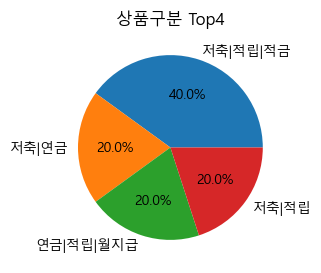

In [9]:
# 원으로 상품구분의 최다 갯수 3개를 그려본다.
plt.figure(figsize=(3, 3)) # 그래프의 크기(단위는 inch) => 가로:3인치, 세로 3인치

"""
파이 차트를 생성하는 함수

x=top_product_type.values: 각 파이 조각의 크기를 결정하는 값(데이터).

labels=top_product_type.index: 각 파이 조각에 표시될 레이블.

autopct='%1.1f%%': 파이 조각 위에 표시할 퍼센트 포맷.
%1.1f%%는 소수점 1자리까지 퍼센트를 표시
"""
plt.pie(top_product_type.values, labels=top_product_type.index, autopct='%1.1f%%')
plt.title('상품구분 Top4')
plt.show()

### 3. 액션데이터 살펴보기

In [10]:
# 결측치 확인
train_actions.isnull().sum()

사용자ID    0
상품ID     0
추천점수     0
추천일시     0
dtype: int64

In [11]:
# 중복 확인
train_actions.duplicated().sum()

0

### 4. 데이터구조 파악

In [12]:
# 상품 데이터
train_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품ID    7 non-null      int64 
 1   상품명     7 non-null      object
 2   상품구분    7 non-null      object
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [13]:
# 액션 데이터
train_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용자ID   55 non-null     int64  
 1   상품ID    55 non-null     int64  
 2   추천점수    55 non-null     float64
 3   추천일시    55 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ KB


In [14]:
# 기초 통계량 확인
train_actions.describe().T # T를 붙이면 행과 열이 뒤바뀜

,count,mean,std,min,25%,50%,75%,max
사용자ID,55.0,10.927273,6.696750,1.0,4.5,12.0,16.50,22.0
상품ID,55.0,3.618182,2.289193,1.0,1.0,3.0,6.00,7.0
추천점수,55.0,3.727273,1.008382,1.0,3.0,4.0,4.75,5.0


### 5. 데이터 병합

In [15]:
# 상품ID를 기준으로데이터 병합
train_actions_with_name = train_actions.merge(train_product, on='상품ID')

# 미리보기
train_actions_with_name.shape, display(train_actions_with_name.head())

,사용자ID,상품ID,추천점수,추천일시,상품명,상품구분
0,1,2,3.5,2005-04-02 23:53:47,실버연금,연금|적립|월지급
1,1,3,3.5,2005-04-02 23:31:16,내집마련저축,저축|적립
2,1,7,3.5,2005-04-02 23:33:39,MZ미래희망적금,저축|적립|적금
3,2,1,5.0,2000-11-21 15:36:54,아이사랑 저축보험,저축|연금
4,2,2,3.0,2000-11-21 15:29:58,실버연금,연금|적립|월지급


((55, 6), None)

### 6. 협업 필터링
- 사용자의 과거 행동이나 선호도를 기반으로 다른 사용자와의 유사성을 활용하여 추천을 제공하는 방법

In [16]:
# 사용자 기반 협업 필터링 
"""
-유사도 계산 대상: 사용자 간 유사도
-입력 데이터: 사용자-아이템 행렬(User-Item Matrix)
  행: 사용자
  열: 아이템
-값: 사용자의 영화 클릭 수
-동작: 사용자 간 유사도를 계산하여, 나와 유사한 사용자가 좋아했던 아이템을 추천.
"""
# 사용자-아이템 행렬
data = {
    '영화 A': [5, 3, 0],
    '영화 B': [4, 0, 5],
    '영화 C': [1, 1, 0],
    '영화 D': [0, 0, 2]
}
df = pd.DataFrame(data, index=['사용자 1', '사용자 2', '사용자 3'])
display(df)

print('')

# 사용자 간 유사도 계산
cosine_sim = cosine_similarity(df)
similarity_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)
display(similarity_df)

"""
사용자 1과 사용자 2의 유사도가 가장 높음.
따라서, 사용자 기반 협업 필터링에서는 사용자 1이 좋아한 아이템 중 사용자 2가 보지 않은 아이템을 추천합니다.
"""

,영화 A,영화 B,영화 C,영화 D
사용자 1,5,4,1,0
사용자 2,3,0,1,0
사용자 3,0,5,0,2


,사용자 1,사용자 2,사용자 3
사용자 1,1.000000,0.78072,0.573068
사용자 2,0.780720,1.00000,0.000000
사용자 3,0.573068,0.00000,1.000000


'\n사용자 1과 사용자 2의 유사도가 가장 높음.\n따라서, 사용자 기반 협업 필터링에서는 사용자 1이 좋아한 아이템 중 사용자 2가 보지 않은 아이템을 추천합니다.\n'

In [17]:
# 사용자-아이템 행렬
"""
-유사도 계산 대상: 아이템 간 유사도
-입력 데이터: 사용자-아이템 행렬(User-Item Matrix)
  행: 사용자
  열: 아이템
-값: 사용자가 아이템에 부여한 평점, 클릭 수, 구매 여부 등
-동작:아이템 간 유사도를 계산하여, 내가 선호한 아이템과 유사한 아이템을 추천.
"""
data = {
    '영화 A': [5, 3, 0],
    '영화 B': [4, 0, 5],
    '영화 C': [1, 1, 0],
    '영화 D': [0, 0, 2]
}
df = pd.DataFrame(data, index=['사용자 1', '사용자 2', '사용자 3'])
display(df.T)

print('')

# 아이템 간 유사도 계산 (전치)
cosine_sim = cosine_similarity(df.T)
similarity_df = pd.DataFrame(cosine_sim, index=df.columns, columns=df.columns)
display(similarity_df)

"""
영화 A와 영화 B의 유사도가 가장 높음.
따라서, 아이템 기반 협업 필터링에서는 내가 본 영화 중 하나가 영화 A라면, 유사도가 높은 영화 B를 추천합니다.
"""

,사용자 1,사용자 2,사용자 3
영화 A,5,3,0
영화 B,4,0,5
영화 C,1,1,0
영화 D,0,0,2


,영화 A,영화 B,영화 C,영화 D
영화 A,1.000000,0.535672,0.970143,0.000000
영화 B,0.535672,1.000000,0.441726,0.780869
영화 C,0.970143,0.441726,1.000000,0.000000
영화 D,0.000000,0.780869,0.000000,1.000000


'\n영화 A와 영화 B의 유사도가 가장 높음.\n따라서, 아이템 기반 협업 필터링에서는 내가 본 영화 중 하나가 영화 A라면, 유사도가 높은 영화 B를 추천합니다.\n'

In [18]:
# 그룹화된 각 '사용자ID'에 대해 '추천점수' 열에 값이 있는 행의 개수를 계산

x = train_actions_with_name.groupby('사용자ID').count()['추천점수']
x

사용자ID
1     3
2     7
3     1
4     3
5     1
6     3
7     2
8     3
9     1
10    1
11    1
12    5
13    2
14    2
15    4
16    2
17    1
18    3
19    4
20    3
21    1
22    2
Name: 추천점수, dtype: int64

In [19]:
x = train_actions_with_name.groupby('사용자ID').count()['추천점수'] > 0
x

사용자ID
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
Name: 추천점수, dtype: bool

In [20]:
cf_users = x[x].index # x[x]는 값이 True인 행만 필터링 후 인덱스만 추출 => 결과는 '추천점수'가 하나 이상 있는 사용자ID의 리스트
cf_users

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22],
      dtype='int64', name='사용자ID')

In [21]:
# 선택된 사용자를 대상으로 데이터 선별

# isin(): 행의 '사용자ID'가 cf_users에 포함되어 있다면 True, 포함되어 있지 않다면 False를 반환합니다.
filtered_rating = train_actions_with_name[train_actions_with_name['사용자ID'].isin(cf_users)]
filtered_rating.shape, display(filtered_rating)

,사용자ID,상품ID,추천점수,추천일시,상품명,상품구분
0,1,2,3.5,2005-04-02 23:53:47,실버연금,연금|적립|월지급
1,1,3,3.5,2005-04-02 23:31:16,내집마련저축,저축|적립
2,1,7,3.5,2005-04-02 23:33:39,MZ미래희망적금,저축|적립|적금
3,2,1,5.0,2000-11-21 15:36:54,아이사랑 저축보험,저축|연금
4,2,2,3.0,2000-11-21 15:29:58,실버연금,연금|적립|월지급
5,2,3,5.0,2000-11-21 15:36:54,내집마련저축,저축|적립
6,2,4,5.0,2000-11-21 15:29:58,30일예금,저축|연지급|예금
7,2,5,5.0,2000-11-21 15:36:54,희망미래적금,저축|적립|적금
8,2,6,5.0,2000-11-21 15:31:31,노후보장저축,저축|적금
9,2,7,5.0,2000-11-21 15:30:59,MZ미래희망적금,저축|적립|적금


((55, 6), None)

In [22]:
# 모든 상품을 대상으로 분석할 것인지 결정
# 모든 상품이 대상이 아니라면 분석가의 의견에 따라 상품ID 제한할 수 있다.
y = filtered_rating.groupby('상품ID').count()['추천점수'] > 0
famous_productid = y[y].index

In [23]:
# 선택된 사용자의 정보에서 선택된 상품을 대상으로 최종 작업 데이터 선택
final_ratings = filtered_rating[filtered_rating['상품ID'].isin(famous_productid)]
final_ratings.shape, display(final_ratings.head())

,사용자ID,상품ID,추천점수,추천일시,상품명,상품구분
0,1,2,3.5,2005-04-02 23:53:47,실버연금,연금|적립|월지급
1,1,3,3.5,2005-04-02 23:31:16,내집마련저축,저축|적립
2,1,7,3.5,2005-04-02 23:33:39,MZ미래희망적금,저축|적립|적금
3,2,1,5.0,2000-11-21 15:36:54,아이사랑 저축보험,저축|연금
4,2,2,3.0,2000-11-21 15:29:58,실버연금,연금|적립|월지급


((55, 6), None)

In [24]:
# 테이블 생성
pt = final_ratings.pivot_table(index='상품ID', columns='사용자ID', values='추천점수')
pt

사용자ID,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
상품ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,4.0,...,4.0,4.5,2.0,3.0,NaN,4.0,5.0,4.0,NaN,3.0
2,3.5,3.0,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,...,3.0,NaN,3.0,NaN,NaN,1.0,NaN,2.5,NaN,NaN
3,3.5,5.0,NaN,4.0,NaN,3.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,3.0,4.0,4.0,5.0,4.5,4.0,5.0
7,3.5,5.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,...,NaN,3.5,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [25]:
# 결측치는 추천하지 않은 경우이니 0 으로 채우기
pt.fillna(0,inplace=True)
pt

사용자ID,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
상품ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,4.0,0.0,5.0,0.0,4.0,0.0,4.0,...,4.0,4.5,2.0,3.0,0.0,4.0,5.0,4.0,0.0,3.0
2,3.5,3.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,...,3.0,0.0,3.0,0.0,0.0,1.0,0.0,2.5,0.0,0.0
3,3.5,5.0,0.0,4.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,4.0,5.0,4.5,4.0,5.0
7,3.5,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,3.5,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [26]:
# 유사도 점수 테이블 생성
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.33163827, 0.6209371 , 0.34092883, 0.43959485,
        0.64046455, 0.61213714],
       [0.33163827, 1.        , 0.27582123, 0.43463266, 0.25796969,
        0.25839486, 0.35922356],
       [0.6209371 , 0.27582123, 1.        , 0.42159955, 0.60256366,
        0.480247  , 0.72872065],
       [0.34092883, 0.43463266, 0.42159955, 1.        , 0.71633532,
        0.35579304, 0.51182021],
       [0.43959485, 0.25796969, 0.60256366, 0.71633532, 1.        ,
        0.36660087, 0.42529648],
       [0.64046455, 0.25839486, 0.480247  , 0.35579304, 0.36660087,
        1.        , 0.40203438],
       [0.61213714, 0.35922356, 0.72872065, 0.51182021, 0.42529648,
        0.40203438, 1.        ]])

<Axes: >

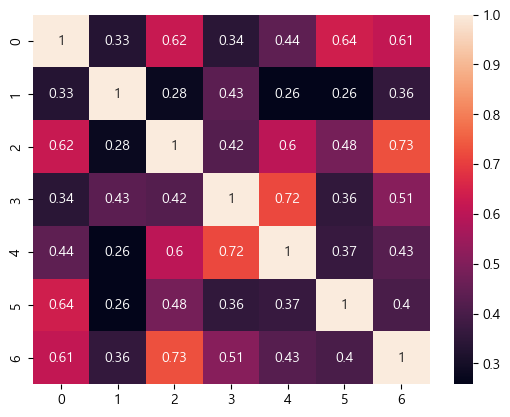

In [27]:
# 유사도 점수 테이블 미리보기
# heatmap(): 행렬 데이터를 시각화 해주고 색상으로 표현해주는 함수
sns.heatmap(similarity_scores, annot=True)

In [28]:
# import numpy as np
# import pandas as pd

# index 3의 실제 위치(0-based index)는 어디인가?
ptest = pd.Series([100, 200, 300, 400], index=[1, 2, 3, 4])
print(ptest)
print('')
print(ptest.index)
print('')

product_id = 3

# 코드 실행
print(np.where(ptest.index == product_id)) # ptest.index에서 product_id가 있는 위치가 2번째(0-based index)라는 의미
print('')
p_index = np.where(ptest.index == product_id)[0][0]

print(p_index)  # 출력: 2

1    100
2    200
3    300
4    400
dtype: int64

Index([1, 2, 3, 4], dtype='int64')

(array([2], dtype=int64),)

2


In [29]:
# 상품ID를 이용한 추천 순위
def get_recommend_by_productid(product_id):
    # 협업 필터링 테이블에서 입력된 상품의 실제 index 위치(0-based index) 찾기
    index = np.where(pt.index == product_id)[0][0]
    print(index)
    
    # 유사도 점수 테이블에서 입력된 상품의 index 위치 값 가져오기
    product_similarity_scores = similarity_scores[index]
    print(product_similarity_scores)
    
    # 위치 값에 순서를 부여하고 리스트형 자료형으로 변환
    product_similarity_scores_list = list(enumerate(product_similarity_scores))
    print(product_similarity_scores_list)
    
    # 첫번째인 위치 값으로 역정렬을 하고 자신을 제외한 나머지를 선택
    """
    -sorted() 함수는 주어진 리스트를 정렬하는 함수입니다.
    -key=lambda x: x[1]: key 인자는 리스트 항목을 정렬할 때 어떤 기준을 사용할지 정의하는 부분
    -lambda x: x[1]는 각 항목에서 두 번째 값(유사도 점수)을 기준으로 정렬하겠다는 뜻입니다. 즉, (상품 ID, 유사도 점수) 중 두 번째 값인 유사도 점수를 기준으로 정렬합니다.
    -reverse=True: 이 옵션은 내림차순으로 정렬하겠다는 의미입니다. 즉, 유사도 점수가 높은 순서대로 정렬됩니다.
    -[1:6]: sorted() 함수로 정렬한 후, 리스트의 1번째부터 5번째까지의 항목을 슬라이싱합니다. 즉, 첫 번째 유사도를 제외하고 유사도 점수가 높은 2번째부터 6번째까지의 제품을 선택하는 것입니다.
    """
    similar_items = sorted(product_similarity_scores_list, key=lambda x: x[1], reverse=True)[1:6]
    print(similar_items)
    
    return similar_items

In [30]:
# 첫번째 상품과 유사한 상품 구하기
k_items = get_recommend_by_productid(1)

print('-' * 50)

# 정렬된 위치 값의 상품ID 출력
for i in k_items:
    print('상품ID', pt.index[i[0]])

0
[1.         0.33163827 0.6209371  0.34092883 0.43959485 0.64046455
 0.61213714]
[(0, 1.0), (1, 0.331638271376152), (2, 0.6209370969220536), (3, 0.34092882678039965), (4, 0.4395948476920284), (5, 0.6404645493836809), (6, 0.6121371368750376)]
[(5, 0.6404645493836809), (2, 0.6209370969220536), (6, 0.6121371368750376), (4, 0.4395948476920284), (3, 0.34092882678039965)]
--------------------------------------------------
상품ID 6
상품ID 3
상품ID 7
상품ID 5
상품ID 4


0
[1.         0.33163827 0.6209371  0.34092883 0.43959485 0.64046455
 0.61213714]
[(0, 1.0), (1, 0.331638271376152), (2, 0.6209370969220536), (3, 0.34092882678039965), (4, 0.4395948476920284), (5, 0.6404645493836809), (6, 0.6121371368750376)]
[(5, 0.6404645493836809), (2, 0.6209370969220536), (6, 0.6121371368750376), (4, 0.4395948476920284), (3, 0.34092882678039965)]
[6, 3, 7, 5, 4]
average_ratings: [4.05, 3.8125, 3.875, 3.0, 3.5]


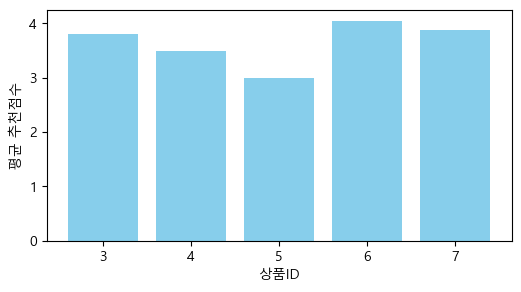

In [31]:
# 유사 상품들의 평균 추천점수 분포
def plot_mean_recommend_by_productid(product_id):
    # 입력된 상품ID와 유사한 상품 구하기
    similar_items = get_recommend_by_productid(product_id)

    similar_productid = [pt.index[i[0]] for i in similar_items]
    print(similar_productid)
    
    """
    -for product_id in similar_productid: 이 부분은 similar_productid 리스트에 있는 각 제품 ID (product_id)에 대해 반복합니다.
    -final_ratings[final_ratings['상품ID'] == product_id]: final_ratings라는 데이터프레임에서, '상품ID' 컬럼이 현재의 product_id와 일치하는 행들을 필터링합니다.
    -['추천점수']: 필터링된 데이터에서 '추천점수'라는 컬럼만을 선택합니다.
    -.mean(): '추천점수' 컬럼에서 선택된 값들의 평균을 구합니다.
    """
    average_ratings = [final_ratings[final_ratings['상품ID'] == product_id]['추천점수'].mean() for product_id in similar_productid]
    print('average_ratings:', average_ratings)

    plt.figure(figsize=(6, 3))
    plt.bar(similar_productid, average_ratings, color='skyblue')
    plt.xlabel('상품ID')
    plt.ylabel('평균 추천점수')
    plt.show()

plot_mean_recommend_by_productid(1)

### 7. 협업 필터링 테이블 저장과 불러오기

In [32]:
import pickle

In [33]:
# 저장 객체 정의
save_object = [pt]

In [34]:
# 저장
with open(file='finance_model.pickle', mode='wb') as f:
    pickle.dump(save_object, f)

In [35]:
# 저장된 객체 불러오기
with open(file='finance_model.pickle', mode='rb') as f:
    load_object = pickle.load(f)

In [36]:
# 저장된 객체 분리
pt = load_object[0]

In [37]:
# 미리보기
pt

사용자ID,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
상품ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,4.0,0.0,5.0,0.0,4.0,0.0,4.0,...,4.0,4.5,2.0,3.0,0.0,4.0,5.0,4.0,0.0,3.0
2,3.5,3.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,...,3.0,0.0,3.0,0.0,0.0,1.0,0.0,2.5,0.0,0.0
3,3.5,5.0,0.0,4.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,4.0,5.0,4.5,4.0,5.0
7,3.5,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,3.5,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
